# Noise reduction

First we need to reduce the noise point in the images to make the dataset more clear

We use Binary Image to judge if this is a noise point. If it is we use the point before this noise point to replace.

In [8]:
import sys,os  
from PIL import Image,ImageDraw  

In [9]:
def getPixel(image,x,y,G,N):  
    L = image.getpixel((x,y))  
    if L > G:  
        L = True  
    else:  
        L = False  
  
    nearDots = 0  
    if L == (image.getpixel((x - 1,y - 1)) > G):  
        nearDots += 1  
    if L == (image.getpixel((x - 1,y)) > G):  
        nearDots += 1  
    if L == (image.getpixel((x - 1,y + 1)) > G):  
        nearDots += 1  
    if L == (image.getpixel((x,y - 1)) > G):  
        nearDots += 1  
    if L == (image.getpixel((x,y + 1)) > G):  
        nearDots += 1  
    if L == (image.getpixel((x + 1,y - 1)) > G):  
        nearDots += 1  
    if L == (image.getpixel((x + 1,y)) > G):  
        nearDots += 1  
    if L == (image.getpixel((x + 1,y + 1)) > G):  
        nearDots += 1  
  
    if nearDots < N:  
        return image.getpixel((x,y-1))  
    else:  
        return None  

Depend on the point's rgb valu, we compare it with other 8 points around this point. We set the N(0<N<8), when the amount of this point's rgb value and other 8 points value less than N. This point should be the noise point.

G: Integer Image binarization threshold

N: Integer The noise reduction rate 0 <N <8 

Z: Integer The noise reduction frequency 

In [10]:
def clearNoise(image,G,N,Z):  
    draw = ImageDraw.Draw(image)  
  
    for i in range(0,Z):  
        for x in range(1,image.size[0] - 1):  
            for y in range(1,image.size[1] - 1):  
                color = getPixel(image,x,y,G,N)  
                if color != None:  
                    draw.point((x,y),color)  
  
#测试代码  
def main():  
    #打开图片  
    image = Image.open('./train/preprocess/tmp.jpg')  
  
    #将图片转换成灰度图片  
    image = image.convert("L")  
  
    #去噪,G = 50,N = 4,Z = 4  
    clearNoise(image,50,4,4)  
  
    #保存图片  
    image.save("./train/preprocess/test.jpg")  
  
  
if __name__ == '__main__':  
    main()  

![before](./train/preprocess/tmp.jpg)

![after](./train/preprocess/test.jpg)

# Filtering processing

Under the condition of to retain the image details characteristics of target image noise suppression and image preprocessing is indispensable in the operation, the treatment effect is good or bad will directly affect the effectiveness and reliability of the subsequent image processing and analysis

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Opencv provides A generic 2 d filtering function to cv2 filter2D (), the use of filter function needs A nuclear template, the image of the filtering process is: put the image and the template of A pixel on A, and the matching of every pixel on the image, and nuclear is different, the results are different.

(<matplotlib.axes._subplots.AxesSubplot at 0x21a86fa6a90>,
 <matplotlib.image.AxesImage at 0x21a8ac6ed68>)

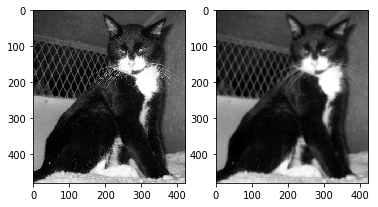

In [5]:
img = cv2.imread('./train/preprocess/tmp.jpg',0) #直接读为灰度图像
img1 = np.float32(img) #转化数值类型
kernel = np.ones((5,5),np.float32)/25

dst = cv2.filter2D(img1,-1,kernel)
#cv2.filter2D(src,dst,kernel,auchor=(-1,-1))函数：
#输出图像与输入图像大小相同
#中间的数为-1，输出数值格式的相同plt.figure()
plt.subplot(1,2,1),plt.imshow(img1,'gray')#默认彩色，另一种彩色bgr
plt.subplot(1,2,2),plt.imshow(dst,'gray')

# Image enhancement

In [6]:
from PIL import Image  
from PIL import ImageEnhance  

The original image

(<matplotlib.axes._subplots.AxesSubplot at 0x21a86f8bd30>,
 <matplotlib.image.AxesImage at 0x21a8ae04ac8>)

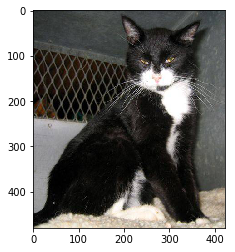

In [15]:
#原始图像  
image = Image.open('./train/preprocess/tmp.jpg')  
plt.subplot(),plt.imshow(image)

Brightness enhancing

(<matplotlib.axes._subplots.AxesSubplot at 0x21a8ae13e48>,
 <matplotlib.image.AxesImage at 0x21a8ae5aba8>)

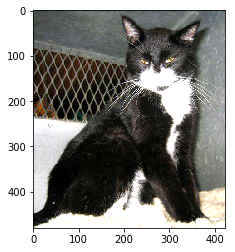

In [16]:
#亮度增强  
enh_bri = ImageEnhance.Brightness(image)  
brightness = 1.5  
image_brightened = enh_bri.enhance(brightness)  
plt.subplot(),plt.imshow(image_brightened)

Color enhancing

(<matplotlib.axes._subplots.AxesSubplot at 0x21a8ae24198>,
 <matplotlib.image.AxesImage at 0x21a8aeb3eb8>)

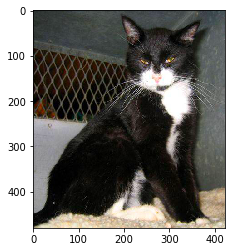

In [17]:
#色度增强  
enh_col = ImageEnhance.Color(image)  
color = 1.5  
image_colored = enh_col.enhance(color)  
plt.subplot(),plt.imshow(image_colored)

Contrast enhancing

(<matplotlib.axes._subplots.AxesSubplot at 0x21a8ae24128>,
 <matplotlib.image.AxesImage at 0x21a8a682048>)

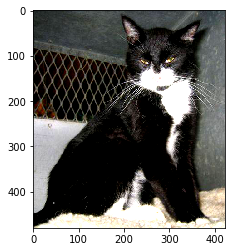

In [18]:
#对比度增强  
enh_con = ImageEnhance.Contrast(image)  
contrast = 1.5  
image_contrasted = enh_con.enhance(contrast)  
plt.subplot(),plt.imshow(image_contrasted)

Sharpness enhabcing

(<matplotlib.axes._subplots.AxesSubplot at 0x21a8a6af4a8>,
 <matplotlib.image.AxesImage at 0x21a8a6a6278>)

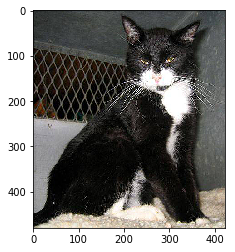

In [20]:
#锐度增强  
enh_sha = ImageEnhance.Sharpness(image)  
sharpness = 3.0  
image_sharped = enh_sha.enhance(sharpness)  
plt.subplot(),plt.imshow(image_sharped)

# Cut some images

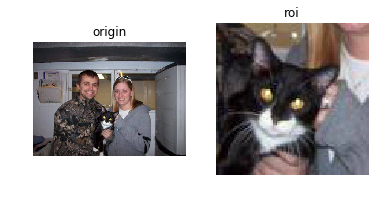

In [29]:
from PIL import Image
import matplotlib.pyplot as plt
img=Image.open('./train/preprocess/cut.jpg')  #打开图像
plt.figure("cut")
plt.subplot(1,2,1), plt.title('origin')
plt.imshow(img),plt.axis('off')

box=(200,200,300,300)
roi=img.crop(box)
plt.subplot(1,2,2), plt.title('roi')
plt.imshow(roi),plt.axis('off')
plt.show()